In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [4]:
titanic_data=pd.read_csv("titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print("no. of passengers: "+str(len(titanic_data)))

no. of passengers: 156


<AxesSubplot:xlabel='Survived', ylabel='count'>

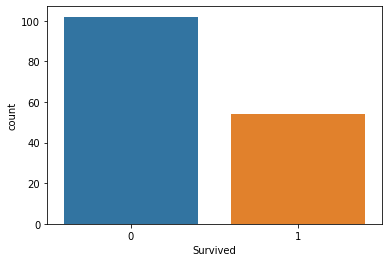

In [10]:
sns.countplot(x="Survived",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

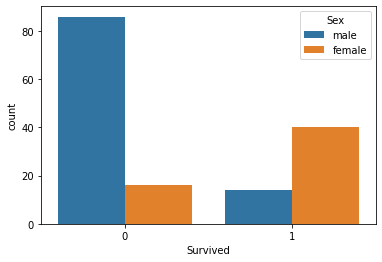

In [12]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

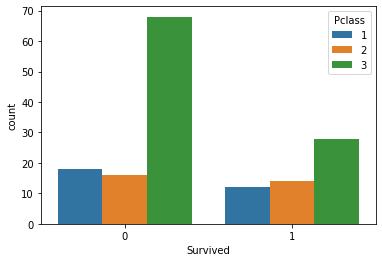

In [13]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

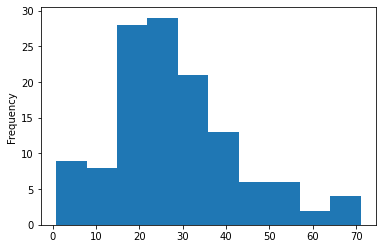

In [14]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

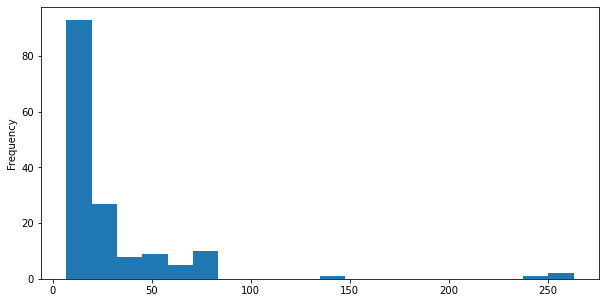

In [17]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [101]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 155
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  125 non-null    int64  
 1   Age       125 non-null    float64
 2   SibSp     125 non-null    int64  
 3   Parch     125 non-null    int64  
 4   Fare      125 non-null    float64
 5   male      125 non-null    float64
 6   Q         125 non-null    float64
 7   S         125 non-null    float64
 8   2         125 non-null    float64
 9   3         125 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 10.7 KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

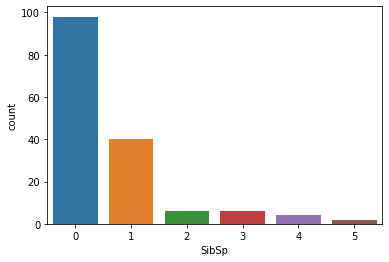

In [19]:
sns.countplot(x="SibSp",data=titanic_data)

In [20]:
#data wrangling
titanic_data.isnull()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,False,True,False
153,False,False,False,False,False,False,False,False,False,False,False,True,False
154,False,False,False,False,False,False,True,False,False,False,False,True,False


In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

<AxesSubplot:>

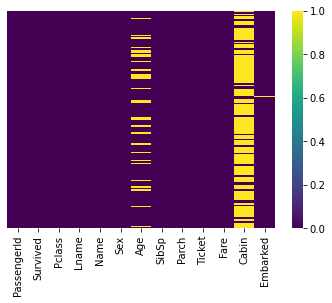

In [27]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

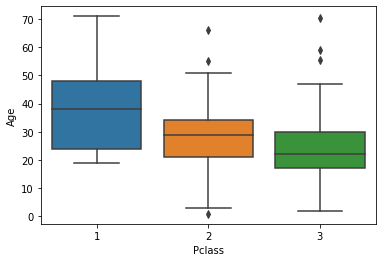

In [28]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [29]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [31]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

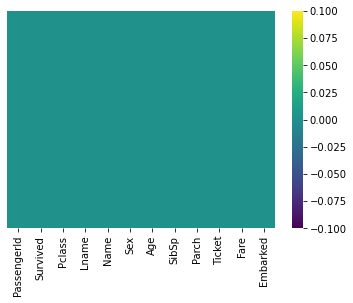

In [32]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

In [40]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
150     1
151     0
152     1
153     1
155     1

[125 rows x 1 columns]


In [43]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
print(embark)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
150  0  1
151  0  1
152  0  1
153  0  1
155  0  0

[125 rows x 2 columns]


In [45]:
Pc1=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
print(Pc1)

     2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
150  1  0
151  0  0
152  0  1
153  0  1
155  0  0

[125 rows x 2 columns]


In [64]:
titanic_data=pd.read_csv("titanic.csv")

In [65]:
titanic_data=pd.concat([titanic_data,sex,embark,Pc1],axis=1)
titanic_data

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,1.0,0.0,1.0
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,0.0,0.0
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,1.0
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,0.0
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S,0.0,0.0,1.0,0.0,0.0
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S,1.0,0.0,1.0,0.0,1.0
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S,1.0,0.0,1.0,0.0,1.0
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,NaN,NaN,NaN,NaN,NaN


In [66]:
titanic_data.drop(['Sex','Embarked','PassengerId','Lname','Pclass','Ticket','Name','Ticket'],axis=1,inplace=True)
titanic_data

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
0,0,22.0,1,0,7.2500,NaN,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,C85,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,NaN,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,C123,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,NaN,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
151,1,22.0,1,0,66.6000,C2,0.0,0.0,1.0,0.0,0.0
152,0,55.5,0,0,8.0500,NaN,1.0,0.0,1.0,0.0,1.0
153,0,40.5,0,2,14.5000,NaN,1.0,0.0,1.0,0.0,1.0
154,0,NaN,0,0,7.3125,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
150,0,51.0,0,0,12.5250,1.0,0.0,1.0,1.0,0.0
151,1,22.0,1,0,66.6000,0.0,0.0,1.0,0.0,0.0
152,0,55.5,0,0,8.0500,1.0,0.0,1.0,0.0,1.0
153,0,40.5,0,2,14.5000,1.0,0.0,1.0,0.0,1.0


In [88]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

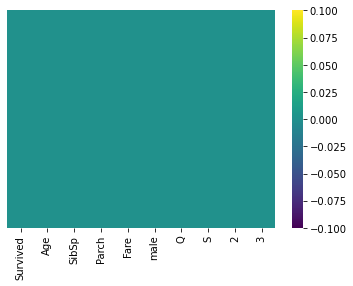

In [90]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

In [102]:
#train data
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [105]:
from sklearn.linear_model import LogisticRegression

In [109]:
log_model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [110]:
logmodel.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
predictions=logmodel.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [112]:
from sklearn.metrics import classification_report

In [113]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.90        29\n           1       0.80      0.44      0.57         9\n\n    accuracy                           0.84        38\n   macro avg       0.82      0.70      0.74        38\nweighted avg       0.84      0.84      0.82        38\n'

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test,predictions)

array([[28,  1],
       [ 5,  4]], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test,predictions)

0.8421052631578947